This analysis focuses on the data set provided by World Health Organization concerning life expectancy.
It contains various factors such as air pollution, alcohol consumption, infant rate mortality etc. for over 190 countries. I will try to learn as much as possible about possible factors and an extent to which they affect/predict life expectancy.<br>

Let's begin with some data exploration.

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('life_exp_data.csv')
print(data.shape)
print(data.columns)
data.head(50)

(2938, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Some of the columns presented above do require some explanation:
* adult mortality - mortality rates of both sexes per 1000 people, aged 15 to 60
* infant mortality - per 1000 people
* alcohol per capita in litres of pure ethanol
* percentage expenditure - % on health of GDP per capita
* total expenditure - goverment expenditure on health as % of budget
* HIV/AIDS - deaths per 1000 live births
* other diseases - immunization coverage among 1 year olds as %
* income composition .. - Human Developement Index (1 the best)

Dealing with missing values, I've decided to fill them with median across given dimension, for two main reasons: firstly, mean would be inadequte as the majority of countries scores similarly low in most dimensions whereas few rich (usually European) countries score very high - so the information would be skewed, secondly, there aren't very many values missing, so using median should give us more or less correct view of the situation

In [454]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [455]:
data = data.fillna(data.median())

C:\Users\aleks\AppData\Local\Temp\ipykernel_13656\1553445849.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [456]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [457]:
print(f"Countries in dataframe: {set(data['Country'].values)}")
data['Country'].value_counts()

Countries in dataframe: {'Togo', 'Portugal', 'United Arab Emirates', 'Namibia', 'Samoa', 'Dominica', 'Malawi', 'Georgia', 'Saint Vincent and the Grenadines', 'Senegal', 'Norway', 'Guatemala', 'Colombia', 'Tuvalu', 'Trinidad and Tobago', 'Qatar', 'United Republic of Tanzania', 'Burkina Faso', 'Honduras', 'Yemen', 'Germany', 'Brunei Darussalam', 'Turkmenistan', 'South Sudan', 'Thailand', 'Bangladesh', 'Mauritania', 'Niue', 'United Kingdom of Great Britain and Northern Ireland', 'Czechia', 'Italy', 'France', 'Congo', 'Serbia', 'Kazakhstan', 'Luxembourg', 'New Zealand', 'Bulgaria', 'Democratic Republic of the Congo', 'San Marino', 'Eritrea', 'Hungary', 'Paraguay', 'Slovenia', 'Suriname', 'Vanuatu', 'Japan', 'Libya', 'Seychelles', 'Angola', "Democratic People's Republic of Korea", 'Switzerland', 'China', 'Cook Islands', 'Djibouti', 'Gambia', 'Benin', 'Afghanistan', 'Brazil', 'Burundi', 'Kenya', 'Saint Kitts and Nevis', 'Algeria', 'Ecuador', "Lao People's Democratic Republic", 'The former Yu

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

As we can see, there are multiple entrances for certain countries which means, we can observe how they changed throughout the years and hence test our hypothesis whether focusing on certain aspects of economy can extend live expectancy.
Let's see how life expectancy behaves in terms of geographics.
I'll only used the most recent data.

In [458]:
country_latest = {}
[country_latest.update({country: data[data['Country'] == country]['Year'].max()}) for country in countries]
country_expectancy_df = data[data['Year'] == 2015 ][['Country', 'Life expectancy ']].sort_values('Life expectancy ')
data_nonr = data[data['Year'] == 2015 ]

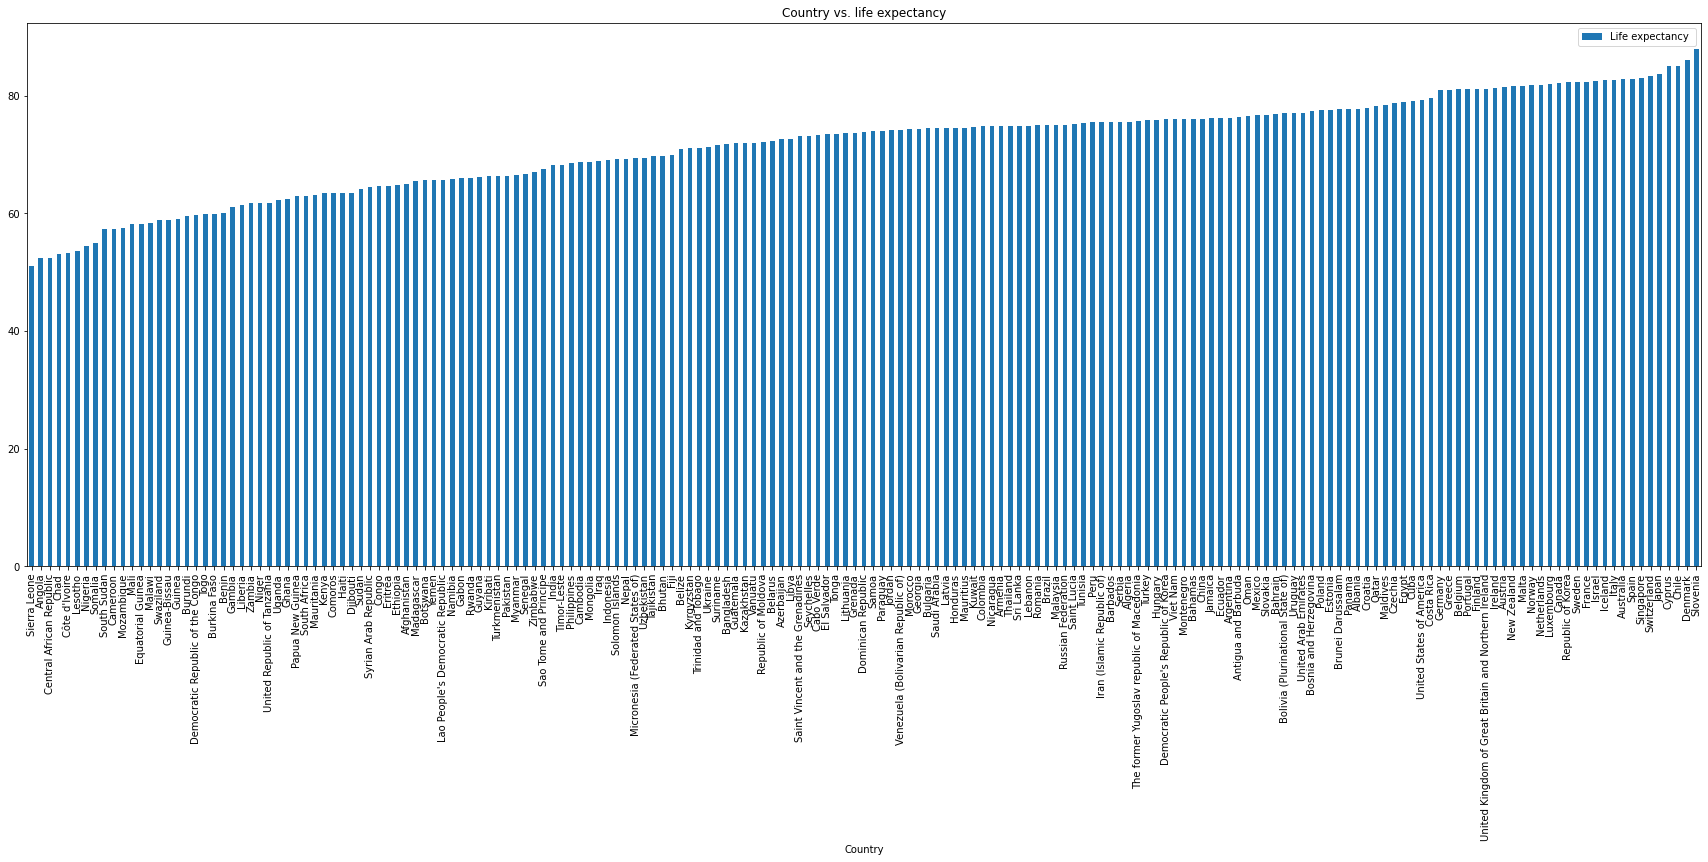

In [459]:
country_expectancy_df.plot.bar(x='Country', y='Life expectancy ', figsize=(30, 10));
plt.title('Country vs. life expectancy');

In [460]:
print(f"Lowest life expectancy: \n{list(country_expectancy_df.sort_values('Life expectancy ').head(20)['Country'])}\n\n")
print(f"Highest life expectancy: \n{list(country_expectancy_df.sort_values('Life expectancy ', ascending=False).head(20)['Country'])}")

Lowest life expectancy: 
['Sierra Leone', 'Angola', 'Central African Republic', 'Chad', "Côte d'Ivoire", 'Lesotho', 'Nigeria', 'Somalia', 'South Sudan', 'Cameroon', 'Mozambique', 'Mali', 'Equatorial Guinea', 'Malawi', 'Swaziland', 'Guinea-Bissau', 'Guinea', 'Burundi', 'Democratic Republic of the Congo', 'Togo']


Highest life expectancy: 
['Slovenia', 'Denmark', 'Chile', 'Cyprus', 'Japan', 'Switzerland', 'Singapore', 'Spain', 'Australia', 'Iceland', 'Italy', 'Israel', 'France', 'Sweden', 'Republic of Korea', 'Canada', 'Luxembourg', 'Netherlands', 'Norway', 'Malta']


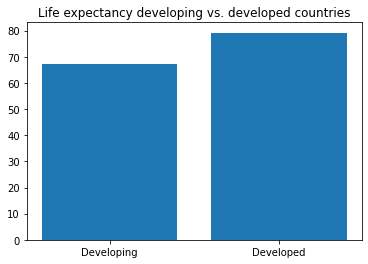

In [461]:
plt.bar(x=['Developing', 'Developed'], height = [data[data['Status'] == 'Developing']['Life expectancy '].mean(), data[data['Status'] == 'Developed']['Life expectancy '].mean()]);
plt.title('Life expectancy developing vs. developed countries');

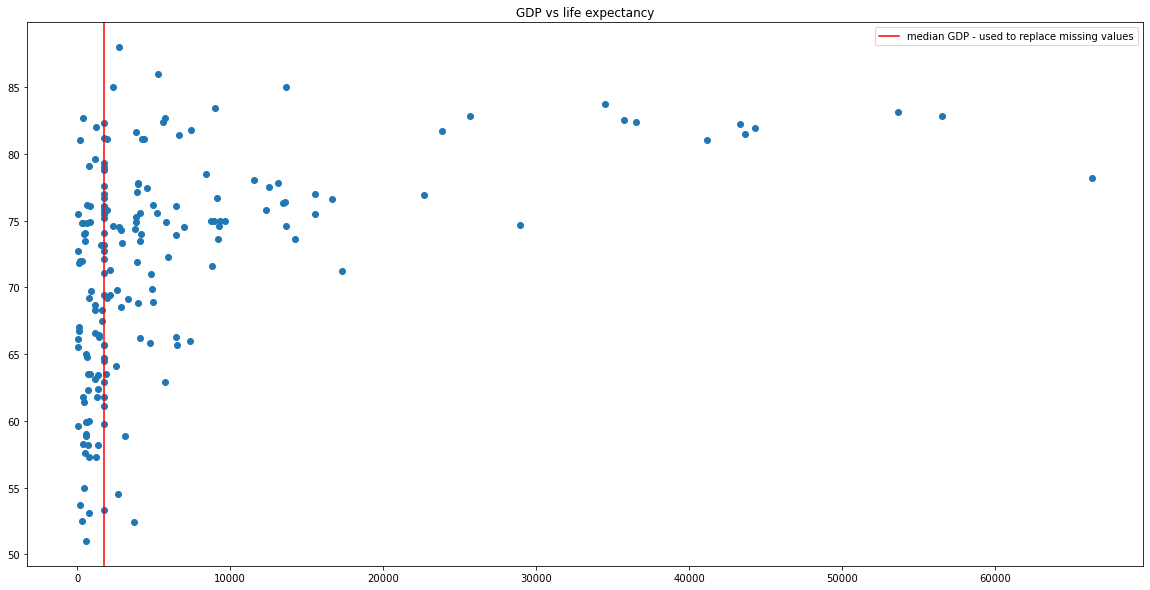

In [462]:
plt.figure( figsize=(20, 10))
plt.scatter(data_nonr['GDP'], data_nonr['Life expectancy ']);
plt.title('GDP vs life expectancy');
plt.axvline(x=data['GDP'].median(), color='r', linestyle='-', label='median GDP - used to replace missing values');
plt.legend();

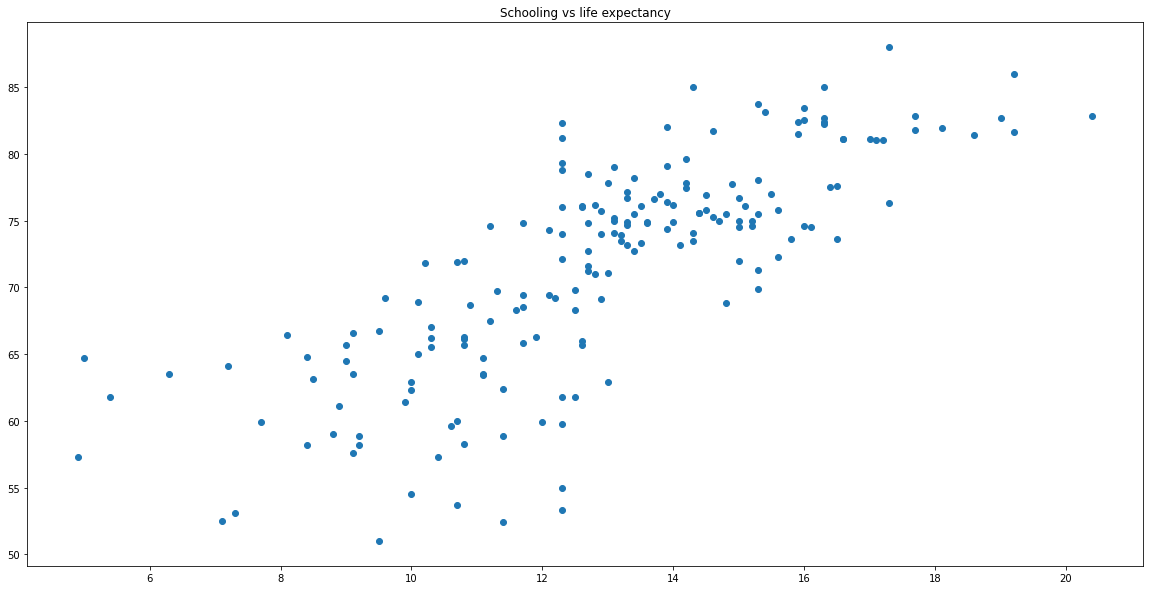

In [463]:
plt.figure( figsize=(20, 10))
plt.scatter(data_nonr['Schooling'], data_nonr['Life expectancy ']);
plt.title('Schooling vs life expectancy');

Already, with data exploration done so far, one can observe certain facts:
* schooling seems to have somewhat linear impact on life expectancy
* GDP does seems to have an impact on life expectancy, althought it is hardly linear 
* life expectancy is significantly higher in developed country than in developing ones

In this part of analysis, I'll try to predict what aspects of economy/healthcare system are most telling about life expectancy and later we'll do a case study based on data how certain countries have been improving throughout the years

In [464]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

x = data_nonr.drop(axis=1, labels='Life expectancy ')['Schooling'].values.reshape(-1, 1)
y = data_nonr['Life expectancy '].values.reshape(-1)

model_schooling = LinearRegression()
model_schooling.fit(x, y)

LinearRegression()

stats are:
MSE:25.88289274924175
score:0.605647949601392


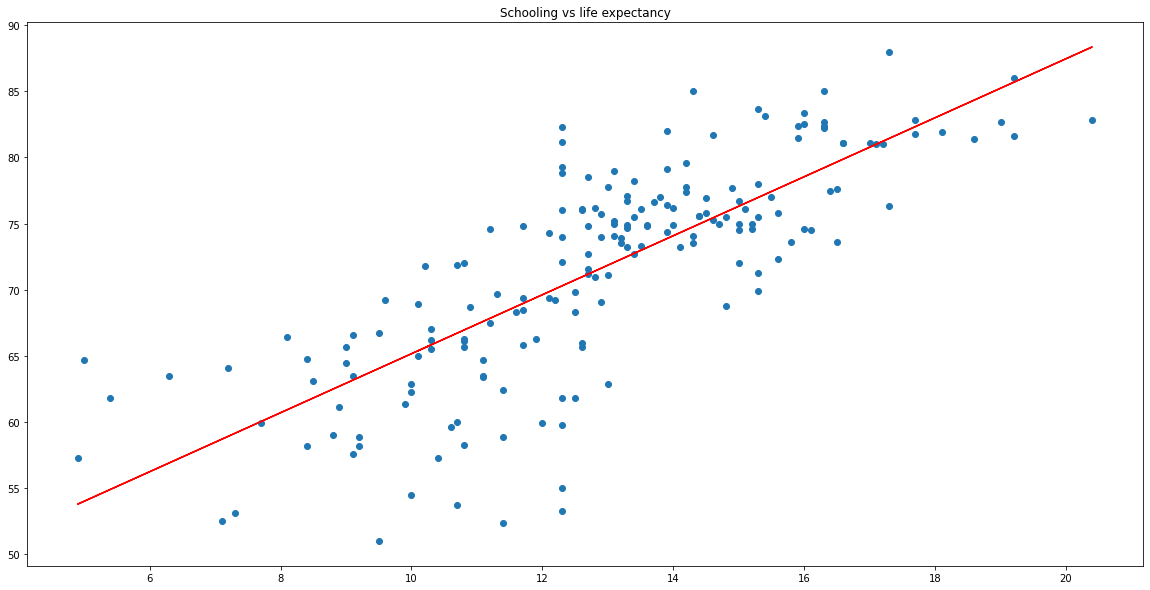

In [465]:
plt.figure( figsize=(20, 10))
plt.scatter(data_nonr['Schooling'], data_nonr['Life expectancy ']);
plt.title('Schooling vs life expectancy');
plt.plot(x, model_schooling.predict(x), color='red');
print(f'stats are:\nMSE:{mean_squared_error(y, model_schooling.predict(x))}\nscore:{model_schooling.score(x, y)}')

In [466]:
# This code is necessary in order to sort values fomr X and y in corresponding order, otherwise polynomial fit
# produces rubbish 
def sort_reshape(x_df, y_df):
    x_df, y_df = zip(*sorted(zip(x_df.tolist(), y_df.tolist())))
    x_df = list(x_df)
    y_df = list(y_df)
    x_df = np.asarray(x_df).reshape(-1, 1)
    y_df = np.asarray(y_df).reshape(-1)
    return x_df, y_df

stats for 3rd degree poly fit are:
MSE:49.265629909383435
score:0.24938829839591636

stats for log fit are:
MSE:50.08455166926405
score:0.23691119708217656


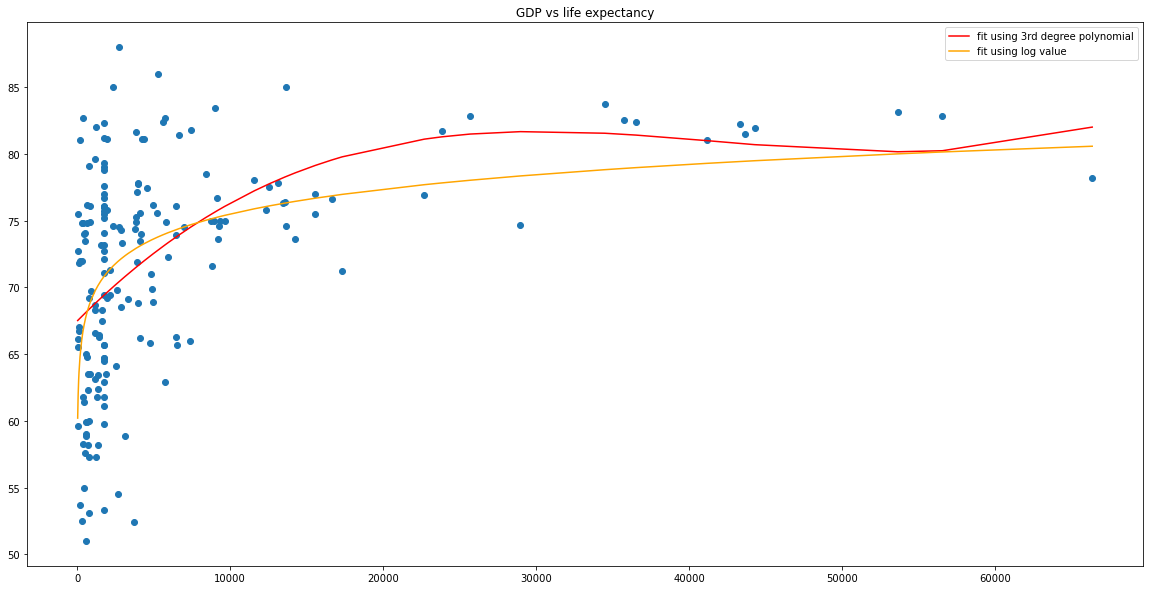

In [467]:
from sklearn.metrics import explained_variance_score

plt.figure( figsize=(20, 10))
plt.scatter(data_nonr['GDP'], data_nonr['Life expectancy ']);
plt.title('GDP vs life expectancy');


x = data_nonr.drop(axis=1, labels='Life expectancy ')['GDP'].values.reshape(-1, 1)
y = data_nonr['Life expectancy '].values.reshape(-1)

x, y = sort_reshape(x, y)

model_gdp = LinearRegression()
poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(x)
model_gdp.fit(x_poly, y)

plt.plot(x, model_gdp.predict(x_poly), color='red', label='fit using 3rd degree polynomial');
print(f'stats for 3rd degree poly fit are:\nMSE:{mean_squared_error(y, model_gdp.predict(x_poly))}\nscore:{model_gdp.score(x_poly, y)}\n')

# Data seems like it would be nicely described by something like log(x) or -e^(-x) - let's see how that would go
x = data_nonr.drop(axis=1, labels='Life expectancy ')['GDP'].values
y = data_nonr['Life expectancy '].values
a, b = np.polyfit(np.log(x), y, 1)
x, y = sort_reshape(x, y)
plt.plot(x, a*np.log(x)+b, color='orange', label='fit using log value'); 

print(f'stats for log fit are:\nMSE:{mean_squared_error(y, [a*np.log(x)+b for x in x])}\nscore:{explained_variance_score(y, [a*np.log(x)+b for x in x])}')
plt.legend();

Now, let's finally predict life expectancy using multiple linear regression

In [468]:
x = data_nonr.drop(axis=1, labels=['Life expectancy ', 'Country', 'Status'])
y = data_nonr['Life expectancy ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

model.fit(x_train, y_train)
print(f'stats: MSE: {mean_squared_error(y_test, model.predict(x_test))}')

stats: MSE: 24.032893973408154


In [469]:
weight_of_attribute= []
features = []
for feature in enumerate(x) :
    a, b = feature[1], model.coef_[feature[0]]
    print(f'{a:<50} {b:>50}')
    weight_of_attribute.append(abs(b))
    features.append(a)

Year                                                                                              0.0
Adult Mortality                                                                   -0.0249662643959218
infant deaths                                                                     0.24084574419831153
Alcohol                                                                            0.5208271200499147
percentage expenditure                                                         -0.0033446464706834633
Hepatitis B                                                                      0.013413363935854345
Measles                                                                       -0.00019122677223600357
 BMI                                                                            -0.004118144227249574
under-five deaths                                                                -0.15749119772142073
Polio                                                                             

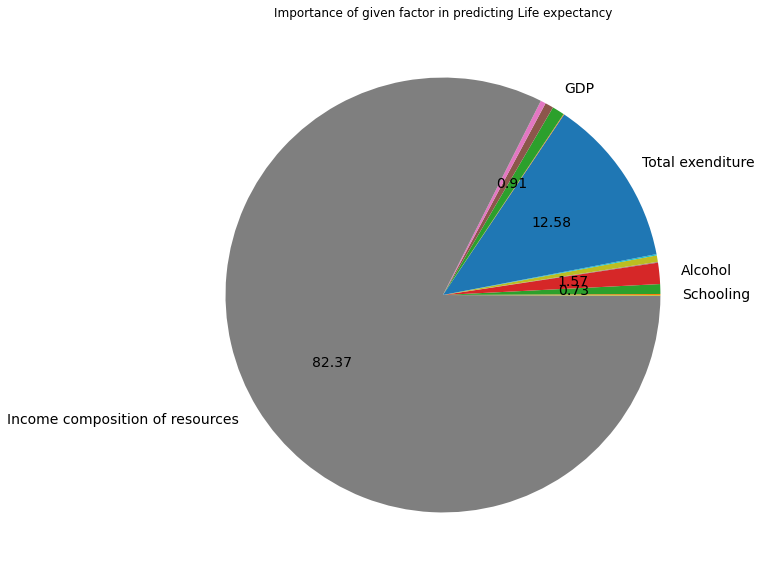

In [470]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.pie(weight_of_attribute, labels=['', '', '', 'Alcohol', '', '', '', '', '','', 'Total exenditure', '', '', 'GDP', '', '', '', 'Income composition of resources', 'Schooling'], autopct=lambda p:format(p, '.2f') if p > 0.7 else None, textprops={'fontsize': 14});
plt.title('Importance of given factor in predicting Life expectancy');

Income composition of resources is, as mentioned, a Humand Developement Index - so all it tells us is that the index is in fact a good predictor of life expectancy. It is a chicken-egg problem, since life expectancy is an important factor when calculating a Human Developement Index - no surprise then that it predicts life expectancy well! <br>
Let's track how the most important features changed as countries developed and increased their life expectancy.

In [471]:
important_features = ['Income composition of resources', 'Total expenditure', 'Schooling', 'Alcohol', 'GDP']
years_tracked = [i for i in range(2000, 2016)]
x = data[important_features + ['Year'] + ['Life expectancy ']]

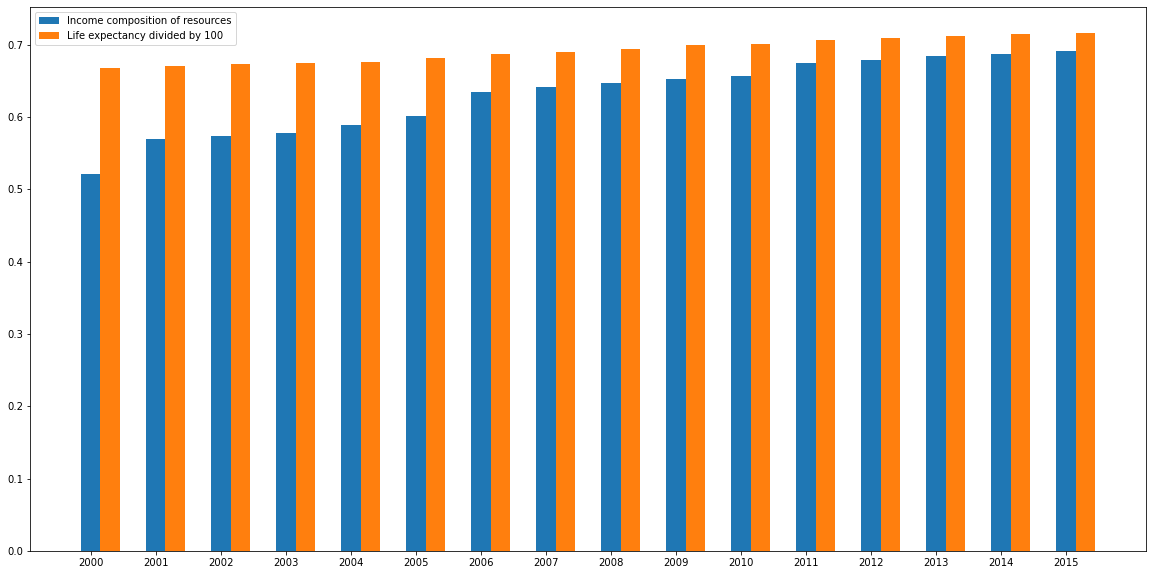

In [472]:
# Income composition of resources
feature = 'Income composition of resources'
fig, ax = plt.subplots(figsize=(20, 10))

labels_loc = np.arange(len(years_tracked))
width = 0.3

income = [x[x['Year'] == year][feature].mean() for year in years_tracked]
life_ex = [x[x['Year'] == year]['Life expectancy '].mean()/100 for year in years_tracked]

ax.bar(labels_loc - width/2, income, width, label='Income composition of resources', tick_label=years_tracked);
ax.bar(labels_loc + width/2, life_ex, width, label='Life expectancy divided by 100');
plt.legend();

This is an interesting plot, although not at the first glance. It tells us that despite mean HDI growing throughout the years, the mean of life expectancy doesn't move by that much (although it moves by more than it seems - do bear in mind that the value we see on the plot is divided by 100). <br>
I can think of an explanation in this way - HDI is much easier to increase and thorought last decade, many countries have been lifting themselfs out of extreme poverty. However, the life expectancy doesn't increase by such a huge factor, as the difference betweeen developed and developing countries isn't that great in absolute values - maximum of 30 years, which in this plot would translate to 0.3 points whereas difference in HDI can be much greater (anywhere between 0-1 really).

There is one country particularly worth exploring deeply - China. It has managed to become a global superpower, lifting milions of people out of extreme poverty in recent years - let's see how it's statistics changed.
We have to bear in mind that statistics about China in general have to be taken with a pinch of salt - the country is not exactly known for its opennes and honesty.

In [473]:
china_df = data[data['Country'] == 'China']
china_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
560,China,2015,Developing,76.1,85.0,157,3.755,0.000000,99.0,42361,...,99.0,5.755,99.0,0.1,869.211938,137122.0,3.6,2.9,0.734,13.5
561,China,2014,Developing,75.8,86.0,171,5.780,109.874390,99.0,52628,...,99.0,5.550,99.0,0.1,7683.523800,136427.0,3.7,3.0,0.723,13.1
562,China,2013,Developing,75.6,88.0,185,5.790,9.955532,99.0,26883,...,99.0,5.390,99.0,0.1,777.775940,135738.0,3.8,3.2,0.713,12.7
563,China,2012,Developing,75.4,89.0,201,5.740,94.434457,99.0,6183,...,99.0,5.260,99.0,0.1,6337.882993,135695.0,3.9,3.3,0.703,12.4
564,China,2011,Developing,75.2,91.0,215,5.630,91.267498,99.0,9943,...,99.0,5.300,99.0,0.1,5633.796160,134413.0,4.1,3.5,0.700,12.8
565,China,2010,Developing,75.0,92.0,231,5.750,5.660755,99.0,38159,...,99.0,4.890,99.0,0.1,456.512487,133775.0,4.2,3.6,0.691,12.5
566,China,2009,Developing,74.9,93.0,248,4.880,50.283489,99.0,52461,...,99.0,5.800,99.0,0.1,3838.434292,133126.0,4.4,3.8,0.682,12.2
567,China,2008,Developing,74.5,97.0,266,4.270,39.225097,95.0,131441,...,99.0,4.590,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,11.9
568,China,2007,Developing,74.4,96.0,285,3.880,312.662482,92.0,109023,...,94.0,4.320,93.0,0.1,2695.366223,1317885.0,4.7,4.1,0.659,11.4
569,China,2006,Developing,74.2,98.0,307,3.280,29.743430,91.0,99602,...,94.0,4.520,93.0,0.1,299.229676,13112.0,4.8,4.3,0.646,11.0


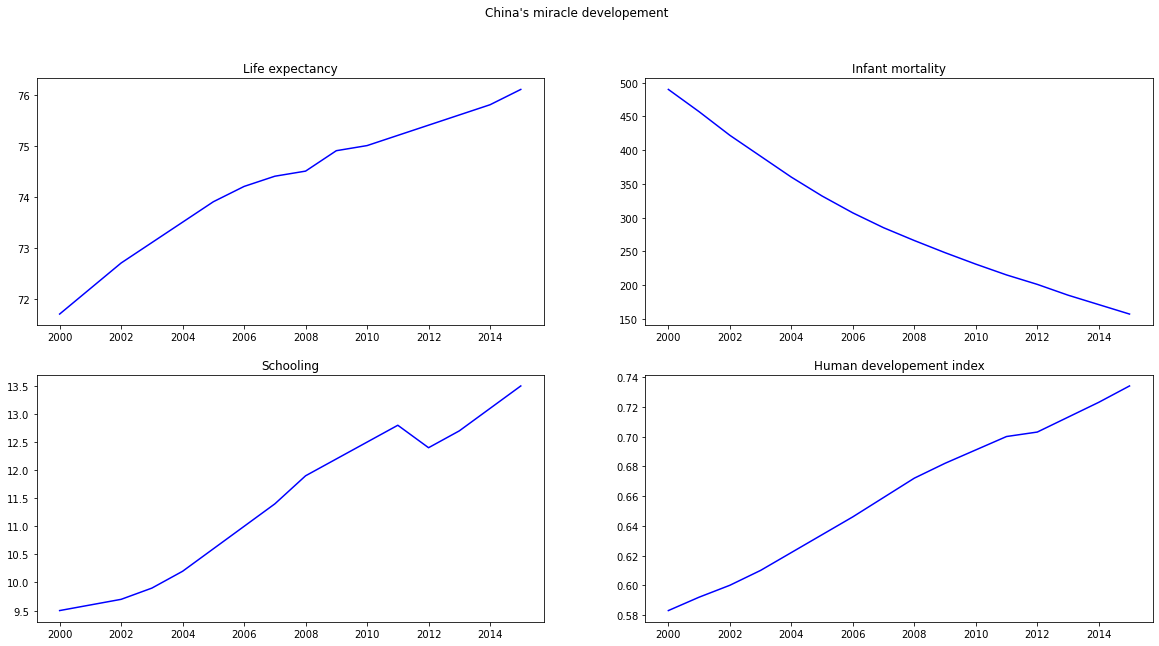

In [474]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("China's miracle developement")
life_exp = [china_df[china_df['Year'] == year]['Life expectancy '] for year in years_tracked]
infant_mortality = [china_df[china_df['Year'] == year]['infant deaths'] for year in years_tracked]
schooling = [china_df[china_df['Year'] == year]['Schooling'] for year in years_tracked]
income_comp = [china_df[china_df['Year'] == year]['Income composition of resources'] for year in years_tracked]

axs[0, 0].plot(years_tracked, life_exp, color='blue');
axs[0, 0].set_title('Life expectancy');

axs[0, 1].plot(years_tracked, infant_mortality, color='blue');
axs[0, 1].set_title('Infant mortality');

axs[1, 0].plot(years_tracked, schooling, color='blue');
axs[1, 0].set_title('Schooling');

axs[1, 1].plot(years_tracked, income_comp, color='blue');
axs[1, 1].set_title('Human developement index');

Just for the comparison (and out of curosity) let's see how Poland has been doing all these years

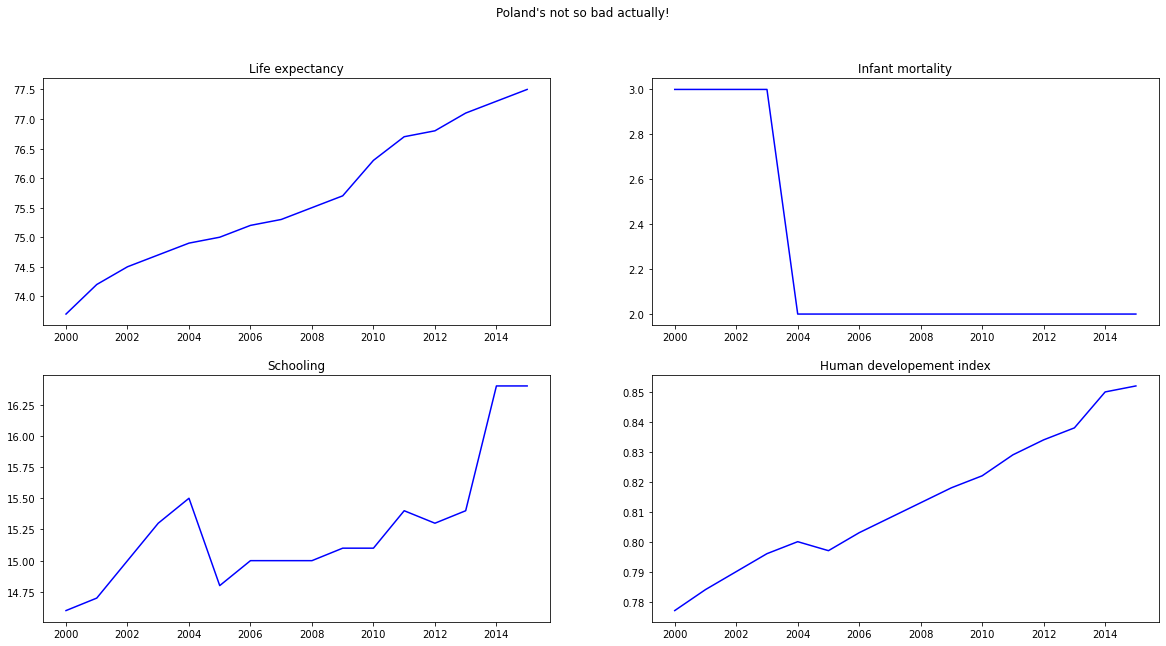

In [475]:
poland_df = data[data['Country'] == 'Poland']

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Poland's not so bad actually!")
life_exp = [poland_df[poland_df['Year'] == year]['Life expectancy '] for year in years_tracked]
infant_mortality = [poland_df[poland_df['Year'] == year]['infant deaths'] for year in years_tracked]
schooling = [poland_df[poland_df['Year'] == year]['Schooling'] for year in years_tracked]
income_comp = [poland_df[poland_df['Year'] == year]['Income composition of resources'] for year in years_tracked]

axs[0, 0].plot(years_tracked, life_exp, color='blue');
axs[0, 0].set_title('Life expectancy');

axs[0, 1].plot(years_tracked, infant_mortality, color='blue');
axs[0, 1].set_title('Infant mortality');

axs[1, 0].plot(years_tracked, schooling, color='blue');
axs[1, 0].set_title('Schooling');

axs[1, 1].plot(years_tracked, income_comp, color='blue');
axs[1, 1].set_title('Human developement index');

As we can see, although we have started off much better point, Poland is not doing so bad as a country (or atleast hasn't been doing so bad in past years). I can only imagine what future brings. 